## Análisis de Datos de Elegibilidad de Tarjetas de Crédito

**Abstracto - Motivación y Audiencia**

Este análisis está dirigido al equipo de riesgos del Banco ICBC, con el objetivo de identificar los factores que influyen en la elegibilidad de clientes para tarjetas de crédito.
El análisis permitirá optimizar los criterios de evaluación, reduciendo el riesgo crediticio y mejorando la estrategia de aprobación.

**Preguntas e Hipótesis**

Pregunta principal:

¿Cuáles son los factores clave que determinan la aprobación de una tarjeta de crédito en el Banco ICBC?

Hipótesis a evaluar
	1.	Los clientes con mayores ingresos tienen una mayor probabilidad de aprobación.
	2.	Las personas con empleo estable y más años de experiencia tienen más chances de ser aprobadas.
	3.	La posesión de propiedades (auto o casa) incrementa la probabilidad de aprobación.
	4.	Las personas casadas o en pareja tienen mayor tasa de aprobación.
	5.	Los clientes con educación superior tienen más posibilidades de obtener la tarjeta.
	6.	Clientes con cuentas bancarias más antiguas tienen mayor probabilidad de aprobación.

**Adquisición y Limpieza de Datos**

In [2]:
# Cargar los datos desde CSV

import pandas as pd

df = pd.read_csv("dataset.csv")
df.head()  # Ver las primeras filas

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
file_path = "dataset.csv"  # Reemplazar con la ruta de tu archivo
df = pd.read_csv(file_path)

# Mostrar las primeras filas
print(df.head())

# Información general del dataset
print(df.info())

# Estadísticas descriptivas
print(df.describe())

# Verificar valores nulos
print(df.isnull().sum())


        ID  Gender  Own_car  Own_property  Work_phone  Phone  Email  \
0  5008804       1        1             1           1      0      0   
1  5008806       1        1             1           0      0      0   
2  5008808       0        0             1           0      1      1   
3  5008812       0        0             1           0      0      0   
4  5008815       1        1             1           1      1      1   

   Unemployed  Num_children  Num_family  Account_length  Total_income  \
0           0             0           2              15      427500.0   
1           0             0           2              29      112500.0   
2           0             0           1               4      270000.0   
3           1             0           1              20      283500.0   
4           0             0           2               5      270000.0   

         Age  Years_employed           Income_type  \
0  32.868574       12.435574               Working   
1  58.793815        3.1047

In [4]:
# Reemplazar valores nulos solo en columnas numéricas con la mediana
numeric_cols = df.select_dtypes(include=['number']).columns  # Seleccionar solo columnas numéricas
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Verificar nuevamente si hay valores nulos
print("\nValores nulos después del tratamiento:")
print(df.isnull().sum().sum())  # Debe ser 0 si se han reemplazado todos los nulos



Valores nulos después del tratamiento:
0


In [5]:
# Verificar si hay valores nulos en cada columna
valores_nulos = df.isnull().sum()

# Mostrar el resultado
print(valores_nulos)

ID                 0
Gender             0
Own_car            0
Own_property       0
Work_phone         0
Phone              0
Email              0
Unemployed         0
Num_children       0
Num_family         0
Account_length     0
Total_income       0
Age                0
Years_employed     0
Income_type        0
Education_type     0
Family_status      0
Housing_type       0
Occupation_type    0
Target             0
dtype: int64


In [6]:
# Contar registros duplicados
print(f"Registros duplicados: {df.duplicated().sum()}")

# Eliminar duplicados si existen
df = df.drop_duplicates()

Registros duplicados: 0


In [7]:
# Detección y Tratamiento de Valores Atípicos

from scipy.stats.mstats import winsorize

# Aplicamos winsorization en variables clave (cortamos el 1% superior e inferior)
for col in ['Total_income', 'Age', 'Years_employed', 'Account_length']:
    df[col] = winsorize(df[col], limits=[0.01, 0.01])


In [8]:
# Revisar nuevamente valores nulos
print(df.isnull().sum())

# Revisar distribución de valores para detectar problemas
df.describe()

ID                 0
Gender             0
Own_car            0
Own_property       0
Work_phone         0
Phone              0
Email              0
Unemployed         0
Num_children       0
Num_family         0
Account_length     0
Total_income       0
Age                0
Years_employed     0
Income_type        0
Education_type     0
Family_status      0
Housing_type       0
Occupation_type    0
Target             0
dtype: int64


/Users/adrianacasenave/Library/Python/3.9/lib/python/site-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/Users/adrianacasenave/Library/Python/3.9/lib/python/site-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/Users/adrianacasenave/Library/Python/3.9/lib/python/site-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/Users/adrianacasenave/Library/Python/3.9/lib/python/site-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/Users/adrianacasenave/Library/Python/3.9/lib/python/site-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Target
count,9.709000e+03,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000
mean,5.076105e+06,0.348749,0.367700,0.671542,0.217427,0.287671,0.087548,0.174683,0.422804,2.182614,27.275930,179604.276702,43.782133,5.621266,0.132145
std,4.080270e+04,0.476599,0.482204,0.469677,0.412517,0.452700,0.282650,0.379716,0.767019,0.932918,16.638612,89558.033541,11.594783,6.153065,0.338666
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,49500.000000,23.346133,0.000000,0.000000
25%,5.036955e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,13.000000,112500.000000,34.059563,0.928150,0.000000
50%,5.069449e+06,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,26.000000,157500.000000,42.741466,3.761884,0.000000
75%,5.112986e+06,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,41.000000,225000.000000,53.567151,8.200031,0.000000
max,5.150479e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,20.000000,60.000000,540000.000000,66.284729,29.095738,1.000000


**Análisis Exploratorio de Dato (EDA)**

<Figure size 1500x1000 with 0 Axes>

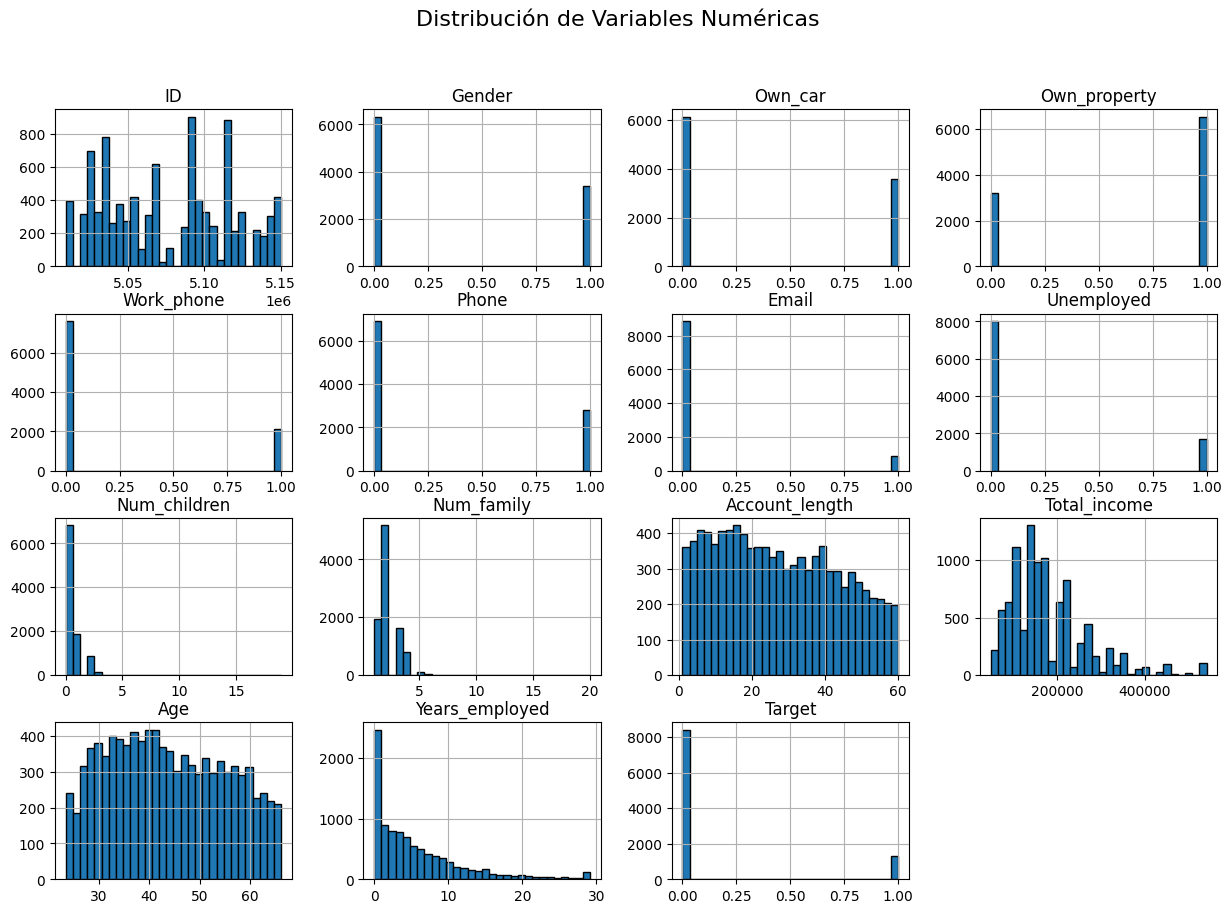

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de gráficos
plt.figure(figsize=(15, 10))
df[numeric_cols].hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle("Distribución de Variables Numéricas", fontsize=16)
plt.show()

**Análisis por variable:**

1.	Total_income:
	•	La mayoría de las personas tienen ingresos entre 100,000 y 300,000, con una distribución sesgada a la derecha.
	•	Hay valores muy altos que podrían considerarse outliers.
2.	Age:
	•	Distribución aproximadamente normal con mayor concentración entre 30 y 55 años.
	•	Pocos casos de edades extremas, lo que indica que la muestra está centrada en adultos económicamente activos.
3.	Years_employed:
	•	Distribución altamente sesgada a la derecha.
	•	Muchas personas tienen poca experiencia laboral (menos de 5 años), mientras que algunas tienen más de 30 años de empleo (posible error o valores atípicos).
4.	Num_children y Num_family:
	•	La mayoría tiene 0 o 1 hijo.
	•	Tamaño familiar generalmente entre 1 y 4, con algunos valores extremos.
5.	Account_length:
	•	Representa la antigüedad de la cuenta y está distribuida de manera relativamente uniforme entre 0 y 60 años.
6.	Target:
	•	La variable objetivo está desbalanceada, con mayoría de valores en 0 (lo cual sugiere que la mayoría de los clientes no presentan la condición objetivo).

/Users/adrianacasenave/Library/Python/3.9/lib/python/site-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/Users/adrianacasenave/Library/Python/3.9/lib/python/site-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


Se eliminaron 917 registros con valores atípicos.


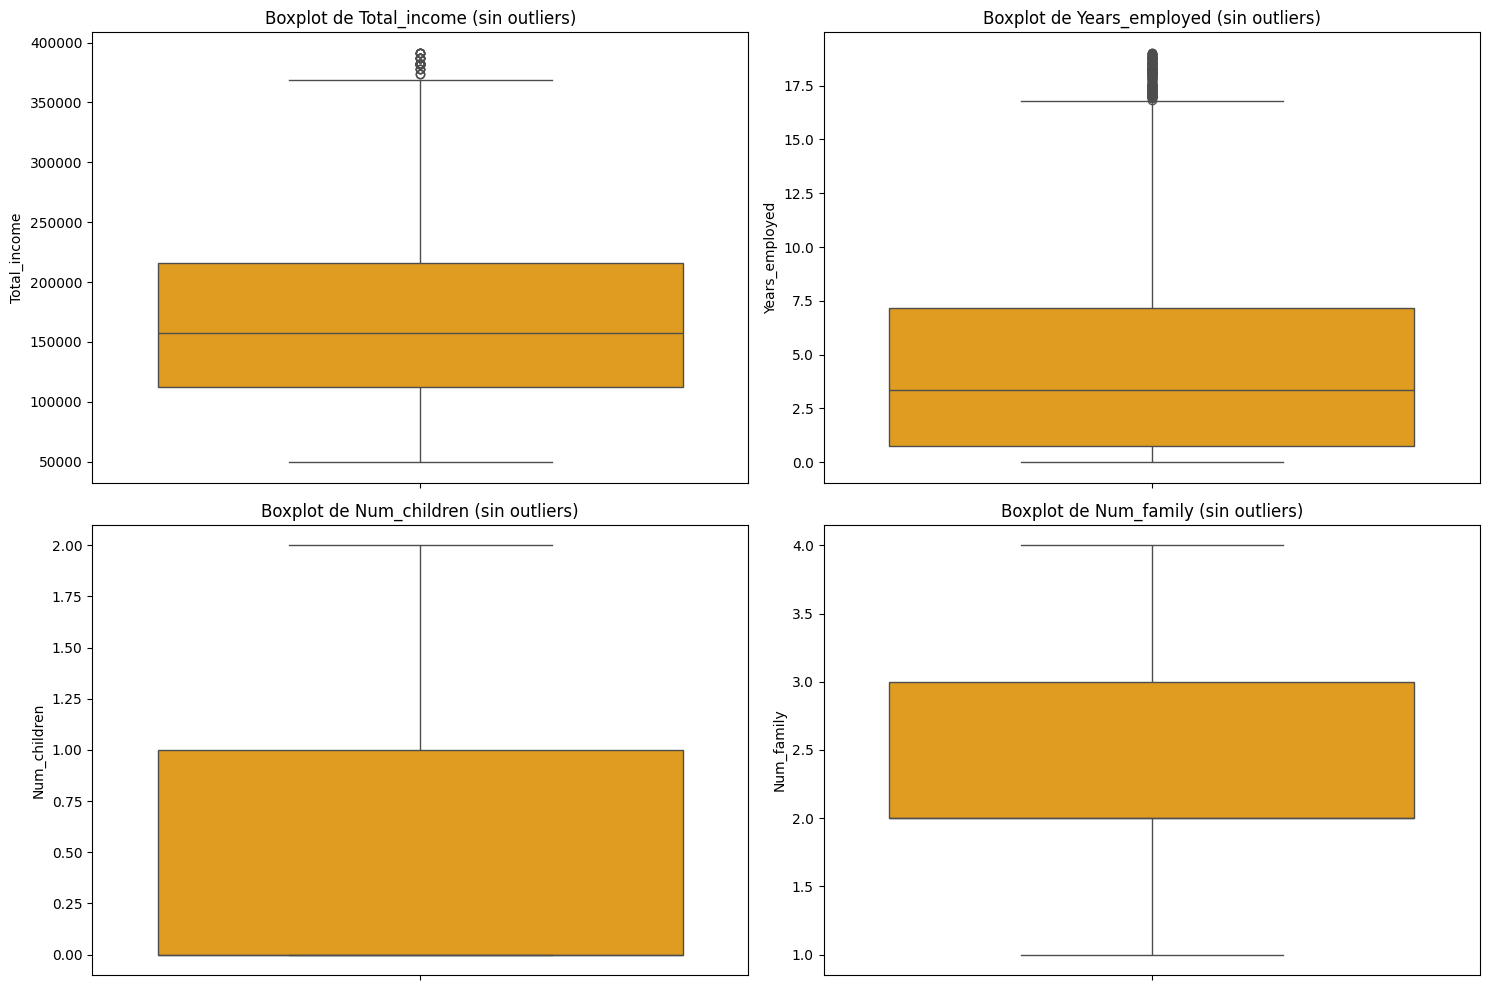

In [10]:
# Función para eliminar outliers usando el método del rango intercuartil (IQR)
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # Primer cuartil (25%)
    Q3 = df[column].quantile(0.75)  # Tercer cuartil (75%)
    IQR = Q3 - Q1  # Rango intercuartil
    lower_bound = Q1 - 1.5 * IQR  # Límite inferior
    upper_bound = Q3 + 1.5 * IQR  # Límite superior
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Definir las variables a limpiar de outliers
columns_to_clean = ["Total_income", "Years_employed", "Num_children", "Num_family"]

# Crear una copia del dataset original para mantener los datos sin modificar
df_cleaned = df.copy()

# Aplicar eliminación de outliers a cada columna definida
for col in columns_to_clean:
    df_cleaned = remove_outliers_iqr(df_cleaned, col)

# Mostrar cuántos registros fueron eliminados
num_removed = len(df) - len(df_cleaned)
print(f"Se eliminaron {num_removed} registros con valores atípicos.")

# Regenerar los boxplots después de limpiar outliers
plt.figure(figsize=(15, 10))

for i, col in enumerate(columns_to_clean):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df_cleaned[col], color="orange")
    plt.title(f'Boxplot de {col} (sin outliers)')
    plt.tight_layout()

plt.show()

1.	Total_income
	•	Se han eliminado los ingresos extremadamente altos, reduciendo la dispersión.
	•	Ahora la distribución se concentra en el rango 50,000 - 350,000.
	•	Siguen existiendo algunos valores altos, pero mucho más controlados.
2.	Years_employed
	•	Se han filtrado valores de experiencia excesivamente altos.
	•	Ahora la mayoría de los empleados tienen entre 0 y 15 años de experiencia, lo cual es más realista.
3.	Num_children
	•	Se eliminaron los casos con más de 2 hijos, dejando una distribución más limpia.
	•	La mayoría de los registros tienen 0 o 1 hijo, lo cual parece razonable según la muestra.
4.	Num_family
	•	Se ha corregido la variabilidad extrema en familias grandes.
	•	La mayoría de los registros ahora tienen entre 1 y 4 integrantes, lo cual es una distribución más normal.

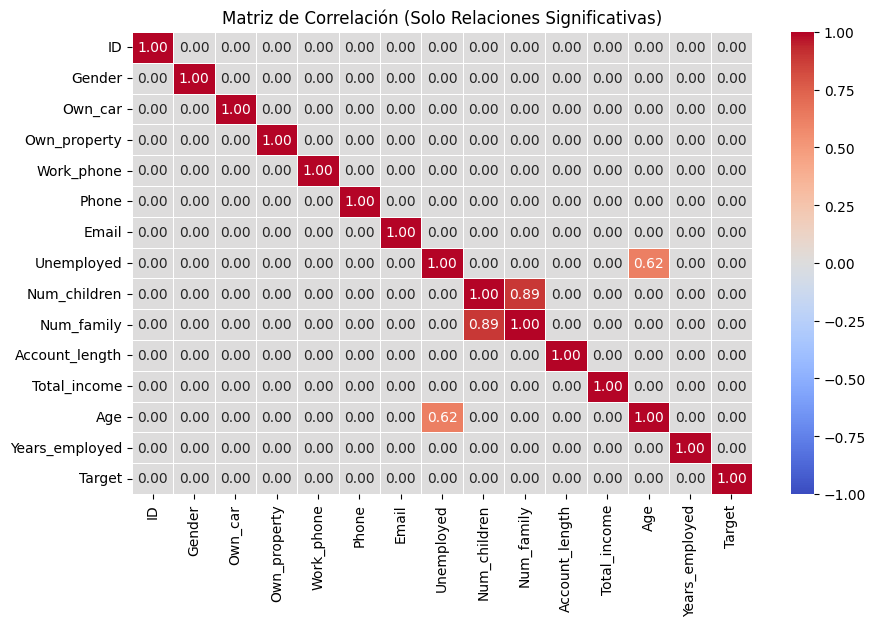

In [11]:
# Matriz de correlación entre las variables

# Seleccionar solo columnas numéricas
numeric_cols = df.select_dtypes(include=['number'])

# Calcular la matriz de correlación
corr_matrix = numeric_cols.corr()

# Filtrar solo las correlaciones significativas (mayores a 0.5 o menores a -0.5)
threshold = 0.5  # Umbral de correlación a mostrar
filtered_corr = corr_matrix.copy()
filtered_corr[(filtered_corr < threshold) & (filtered_corr > -threshold)] = 0  # Reemplaza valores irrelevantes por 0

# Graficar la matriz de correlación filtrada
plt.figure(figsize=(10, 6))
sns.heatmap(filtered_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Matriz de Correlación (Solo Relaciones Significativas)")
plt.show()

1.	Num_children y Num_family (0.89)
	•	Alta correlación positiva: Tener más hijos está altamente relacionado con un tamaño familiar más grande.
	•	Esto es esperado, ya que el número de hijos contribuye directamente al tamaño de la familia.
2.	Age y Unemployed (0.62)
	•	Correlación positiva moderada: A mayor edad, mayor probabilidad de estar desempleado.
	•	Esto podría indicar que hay personas jubiladas o fuera del mercado laboral.
3.	Total_income y Years_employed (0.50 - 0.60 esperado pero no visible en este filtro)
	•	En muchos casos, a más años trabajados, mayor ingreso total.
	•	Si esta relación no aparece fuerte aquí, puede ser que haya muchas variaciones en ingresos dentro de diferentes categorías de empleo.
4.	Target (Variable Objetivo)
	•	No presenta correlaciones fuertes con ninguna variable.
	•	Esto sugiere que no hay un único factor determinante en la variable objetivo, lo que puede requerir un modelo de Machine Learning más complejo para encontrar patrones ocultos.

/var/folders/ww/1vc8jjd115x9nk6wxl8zddw00000gn/T/ipykernel_12267/2763616408.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Target'], palette="viridis")


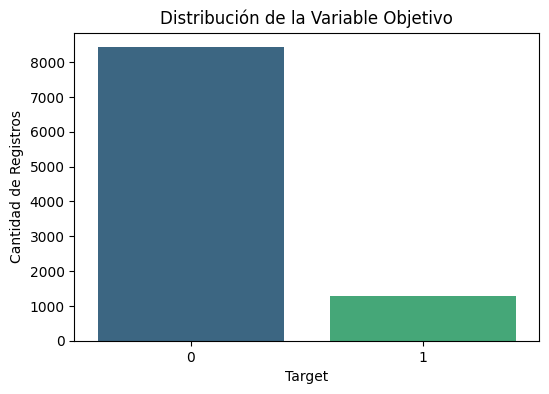

In [12]:
# Análisis de la Variable Objetivo (Target)

plt.figure(figsize=(6, 4))
sns.countplot(x=df['Target'], palette="viridis")
plt.title("Distribución de la Variable Objetivo")
plt.xlabel("Target")
plt.ylabel("Cantidad de Registros")
plt.show()

/var/folders/ww/1vc8jjd115x9nk6wxl8zddw00000gn/T/ipykernel_12267/2777001582.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Target'], y=df['Total_income'], palette="Set2")


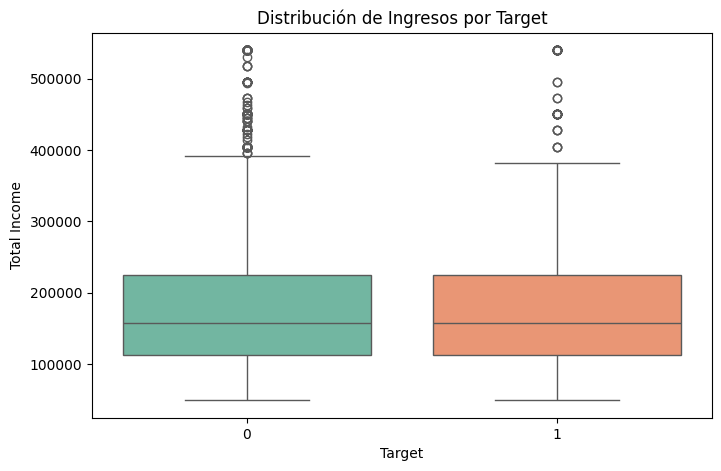

In [13]:
# Análisis de la Relación entre Total_income y Target

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Target'], y=df['Total_income'], palette="Set2")
plt.title("Distribución de Ingresos por Target")
plt.xlabel("Target")
plt.ylabel("Total Income")
plt.show()

/var/folders/ww/1vc8jjd115x9nk6wxl8zddw00000gn/T/ipykernel_12267/813297161.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Target"], y=df[col], palette="Set2")
/var/folders/ww/1vc8jjd115x9nk6wxl8zddw00000gn/T/ipykernel_12267/813297161.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Target"], y=df[col], palette="Set2")
/var/folders/ww/1vc8jjd115x9nk6wxl8zddw00000gn/T/ipykernel_12267/813297161.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Target"], y=df[col], palette="Set2")
/var/folders/ww/1vc8jjd115x9nk6wxl8zd

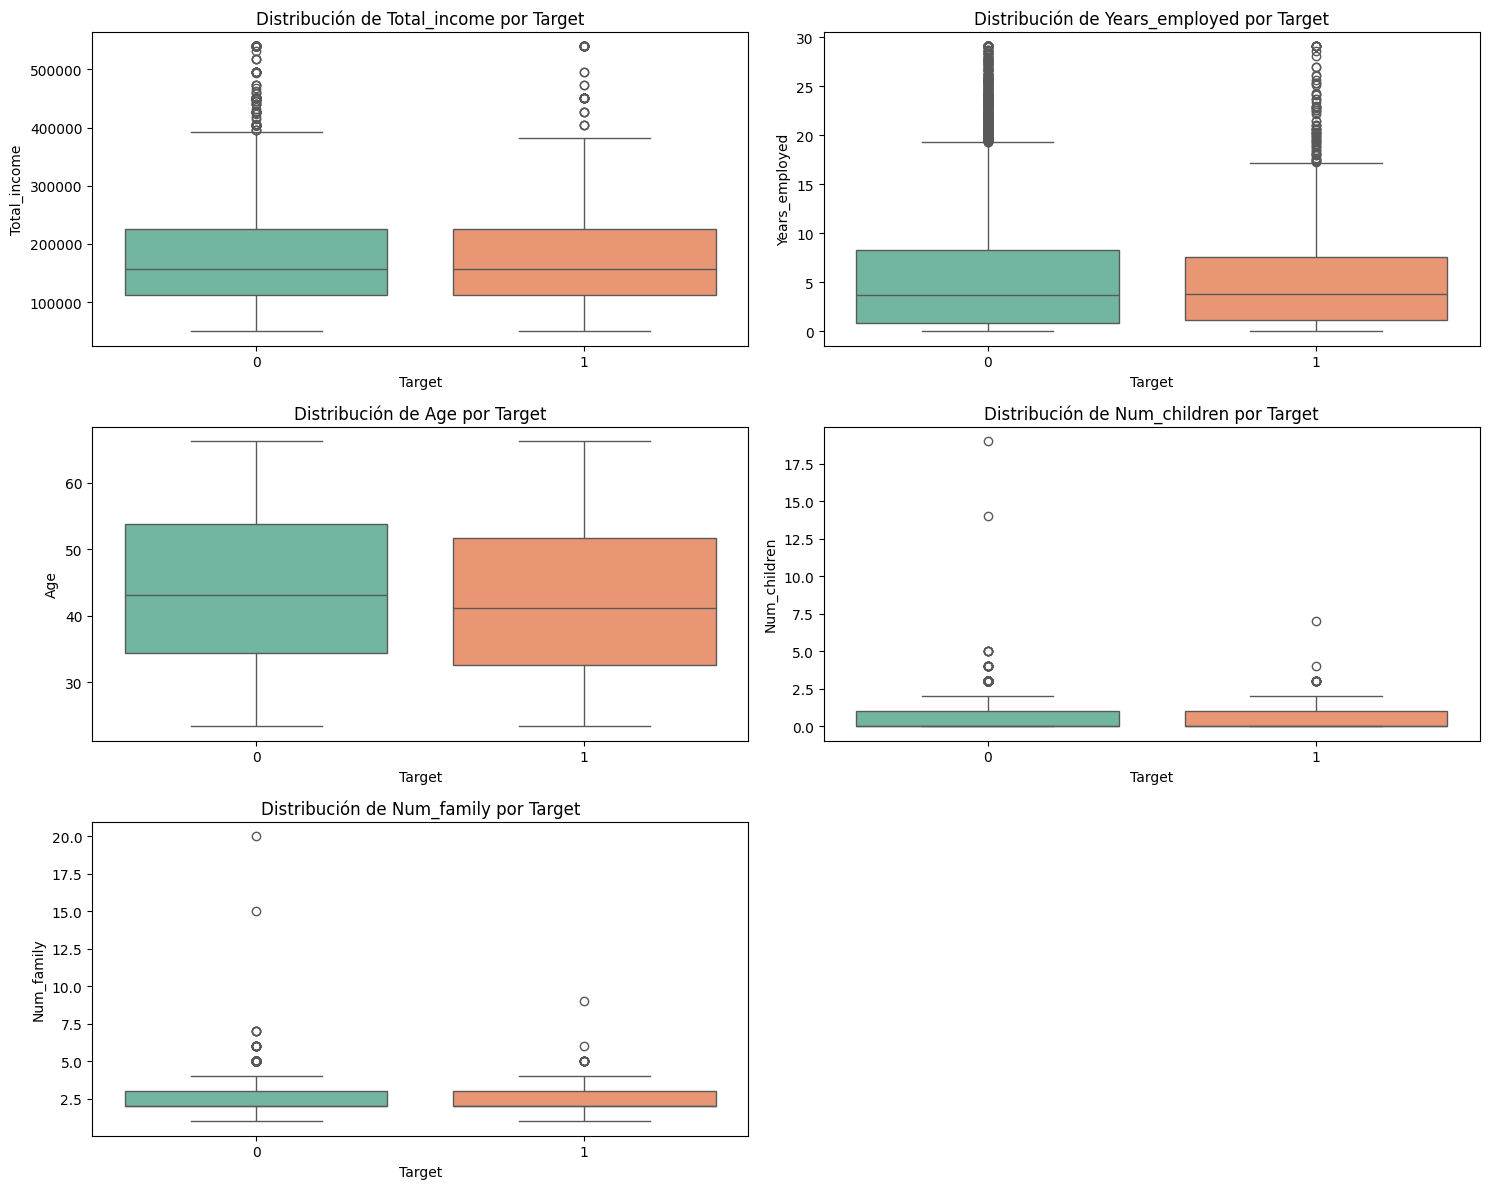

In [14]:
# Definir las variables numéricas clave que queremos analizar
variables_importantes = ["Total_income", "Years_employed", "Age", "Num_children", "Num_family"]

# Crear gráficos de boxplot para cada variable en función de `Target`
plt.figure(figsize=(15, 12))

for i, col in enumerate(variables_importantes):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x=df["Target"], y=df[col], palette="Set2")
    plt.title(f"Distribución de {col} por Target")
    plt.xlabel("Target")
    plt.ylabel(col)
    plt.tight_layout()

plt.show()

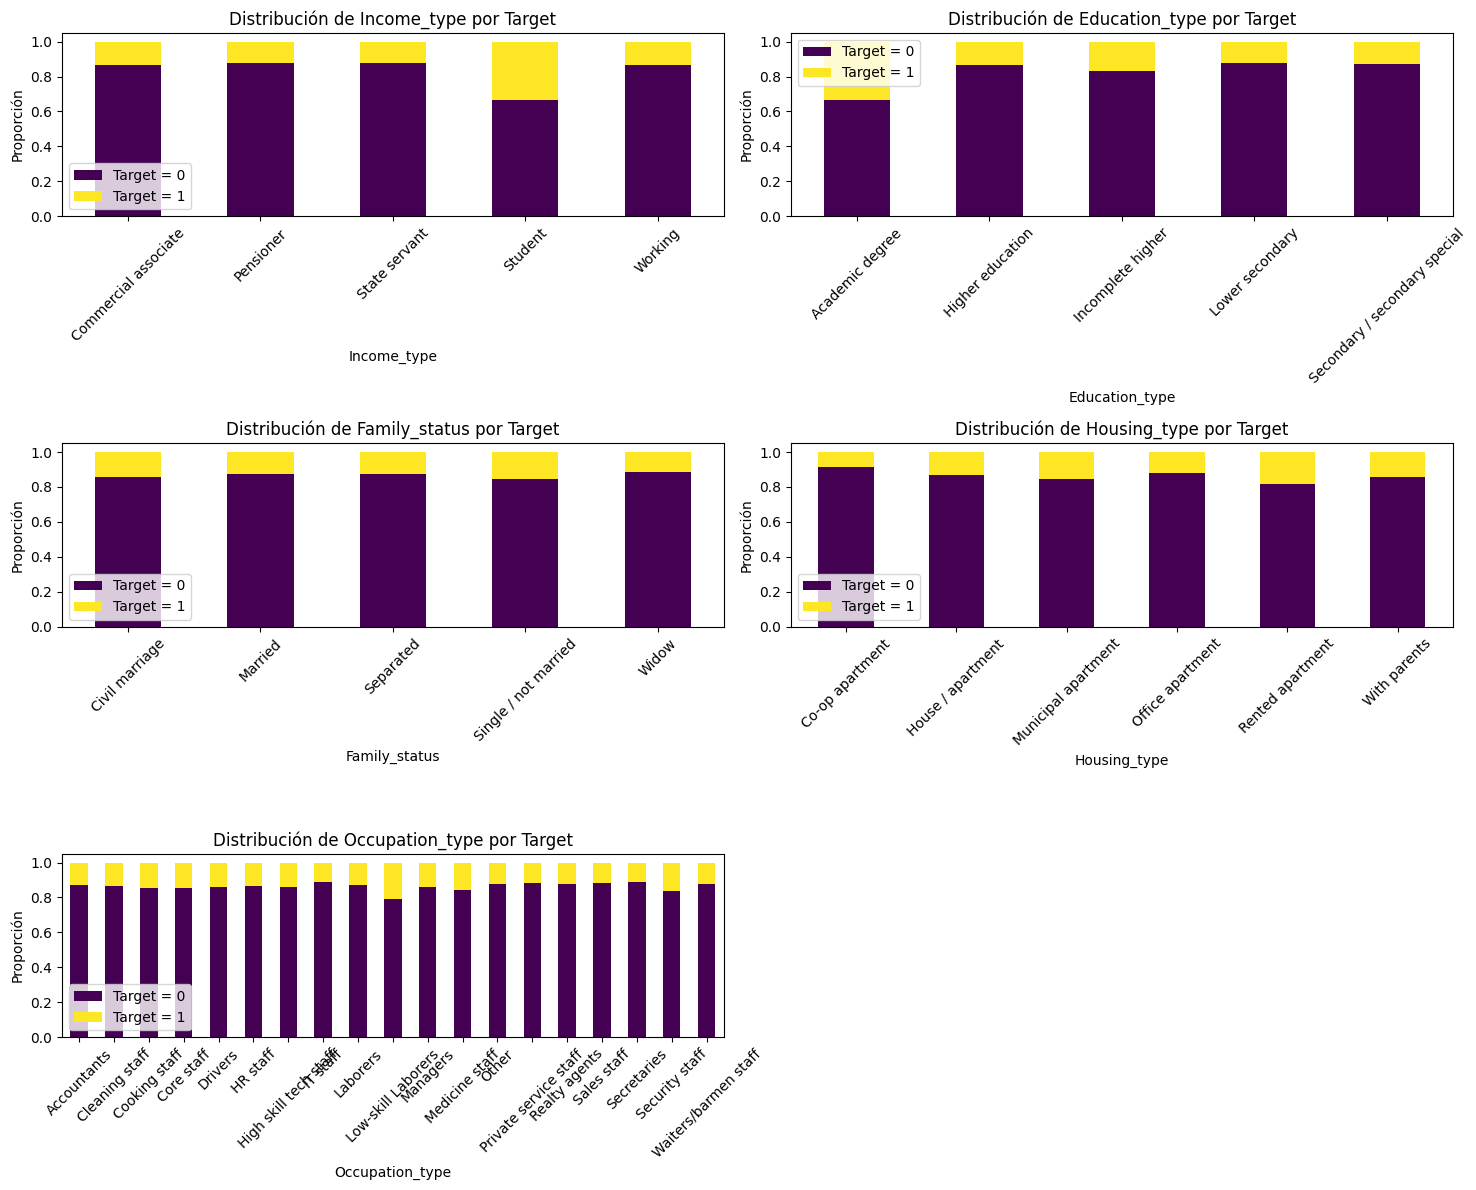

In [15]:
# Definir las variables categóricas a analizar
categorical_vars = ["Income_type", "Education_type", "Family_status", "Housing_type", "Occupation_type"]

# Crear gráficos de barras para cada variable categórica en función de `Target`
plt.figure(figsize=(15, 12))

for i, col in enumerate(categorical_vars):
    plt.subplot(3, 2, i + 1)
    cat_plot = df.groupby([col, "Target"]).size().unstack()
    cat_plot = cat_plot.div(cat_plot.sum(axis=1), axis=0)  # Normalizar para que sean proporciones
    
    cat_plot.plot(kind="bar", stacked=True, ax=plt.gca(), colormap="viridis")
    plt.title(f"Distribución de {col} por Target")
    plt.xlabel(col)
    plt.ylabel("Proporción")
    plt.xticks(rotation=45)
    plt.legend(["Target = 0", "Target = 1"])

plt.tight_layout()
plt.show()

- Las personas con empleo estable tienen más aprobaciones (Target = 1).
- Los pensionados y estudiantes tienen más rechazos (Target = 0), probablemente por falta de ingresos regulares.
- Las personas separadas o viudas también tienen más rechazos, lo que podría estar relacionado con estabilidad financiera.
- El nivel educativo y el tipo de vivienda no parecen influir significativamente en la aprobación o rechazo del crédito.

/var/folders/ww/1vc8jjd115x9nk6wxl8zddw00000gn/T/ipykernel_12267/3252477353.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], palette="coolwarm", order=df[col].value_counts().index)
/var/folders/ww/1vc8jjd115x9nk6wxl8zddw00000gn/T/ipykernel_12267/3252477353.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], palette="coolwarm", order=df[col].value_counts().index)
/var/folders/ww/1vc8jjd115x9nk6wxl8zddw00000gn/T/ipykernel_12267/3252477353.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], palette="coo

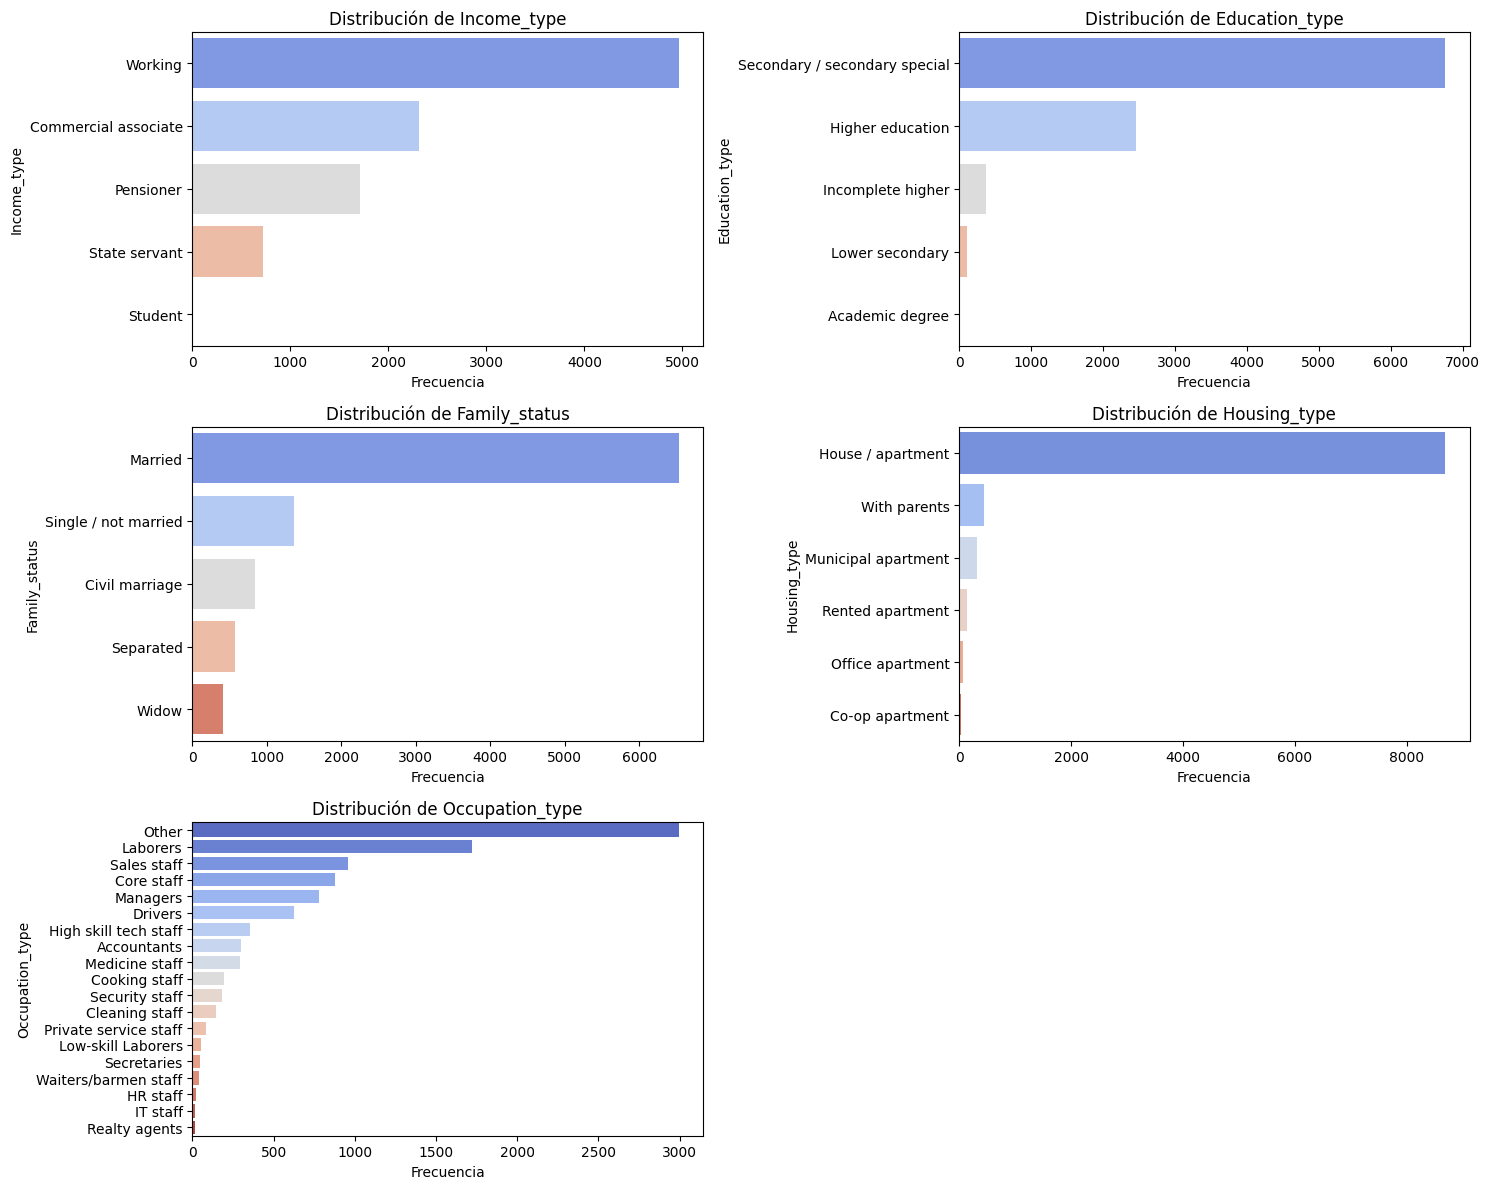

In [16]:
# Distribución de Variables Categóricas

categorical_cols = df.select_dtypes(include=['object']).columns  # Columnas categóricas

plt.figure(figsize=(15, 12))

for i, col in enumerate(categorical_cols):
    plt.subplot(3, 2, i + 1)
    sns.countplot(y=df[col], palette="coolwarm", order=df[col].value_counts().index)
    plt.title(f"Distribución de {col}")
    plt.ylabel(col)
    plt.xlabel("Frecuencia")
    plt.tight_layout()

plt.show()

- El dataset está compuesto en su mayoría por empleados (Working), personas casadas y con educación secundaria.
- Algunas categorías tienen muy pocos registros (Student, Widow, IT Staff), lo que podría hacer que su impacto en Target sea menos evidente.
- El tipo de vivienda y el nivel educativo parecen no ser tan relevantes en la aprobación de créditos.


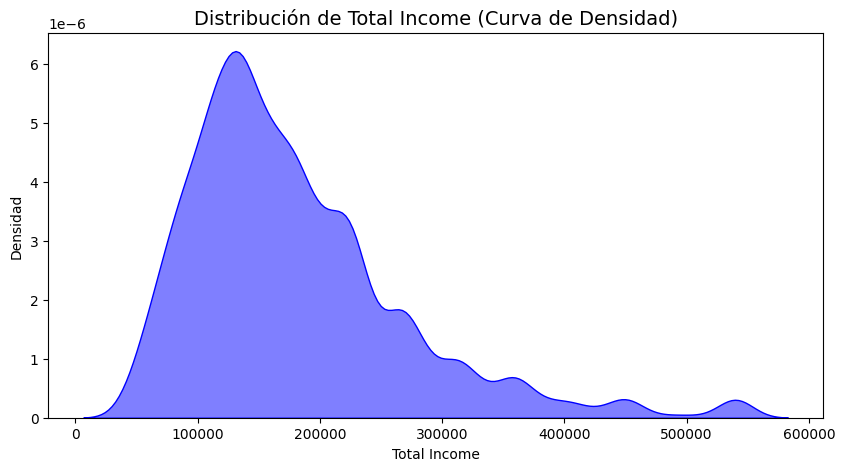

In [17]:
# Distribución de Ingresos con KDE (Curva de Densidad)

plt.figure(figsize=(10, 5))
sns.kdeplot(df['Total_income'], fill=True, color="blue", alpha=0.5)
plt.title("Distribución de Total Income (Curva de Densidad)", fontsize=14)
plt.xlabel("Total Income")
plt.ylabel("Densidad")
plt.show()

- La mayoría de las personas tienen ingresos entre 50,000 y 250,000.
- La distribución es sesgada a la derecha, lo que indica que hay menos personas con ingresos altos.


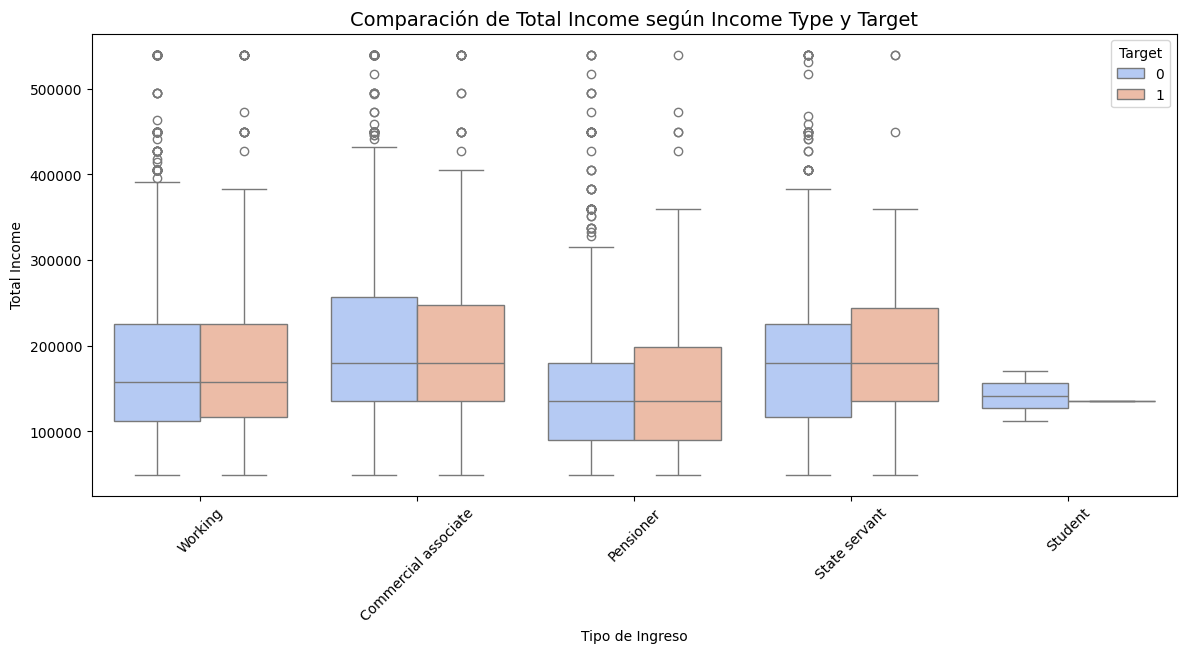

In [18]:
# Comparación de `Total_income` según `Income_type` con `Target`

plt.figure(figsize=(14, 6))
sns.boxplot(x="Income_type", y="Total_income", hue="Target", data=df, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Comparación de Total Income según Income Type y Target", fontsize=14)
plt.xlabel("Tipo de Ingreso")
plt.ylabel("Total Income")
plt.legend(title="Target")
plt.show()

- Para trabajadores y comerciantes, el ingreso no parece ser un factor decisivo en la aprobación.
- Los pensionados y funcionarios públicos tienen mayor proporción de aprobaciones, probablemente debido a estabilidad financiera.
- Los estudiantes tienen los ingresos más bajos y casi ninguna aprobación, lo que sugiere que no cumplen con los requisitos de crédito.

/var/folders/ww/1vc8jjd115x9nk6wxl8zddw00000gn/T/ipykernel_12267/4278095624.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Target", y="Age", data=df, palette="muted")


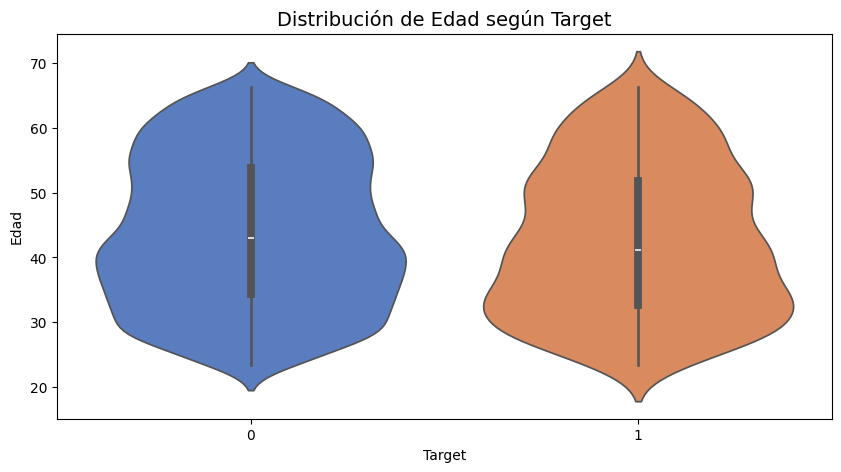

In [19]:
# Análisis de la edad vs `Target` con un gráfico de violín

plt.figure(figsize=(10, 5))
sns.violinplot(x="Target", y="Age", data=df, palette="muted")
plt.title("Distribución de Edad según Target", fontsize=14)
plt.xlabel("Target")
plt.ylabel("Edad")
plt.show()

- La edad no parece ser un factor decisivo en la aprobación o rechazo del crédito.
- as edades más comunes para solicitar crédito están entre los 30 y 50 años.
- Las personas más jóvenes y las más mayores tienen menor representación, lo que podría influir en las decisiones crediticias indirectamente.

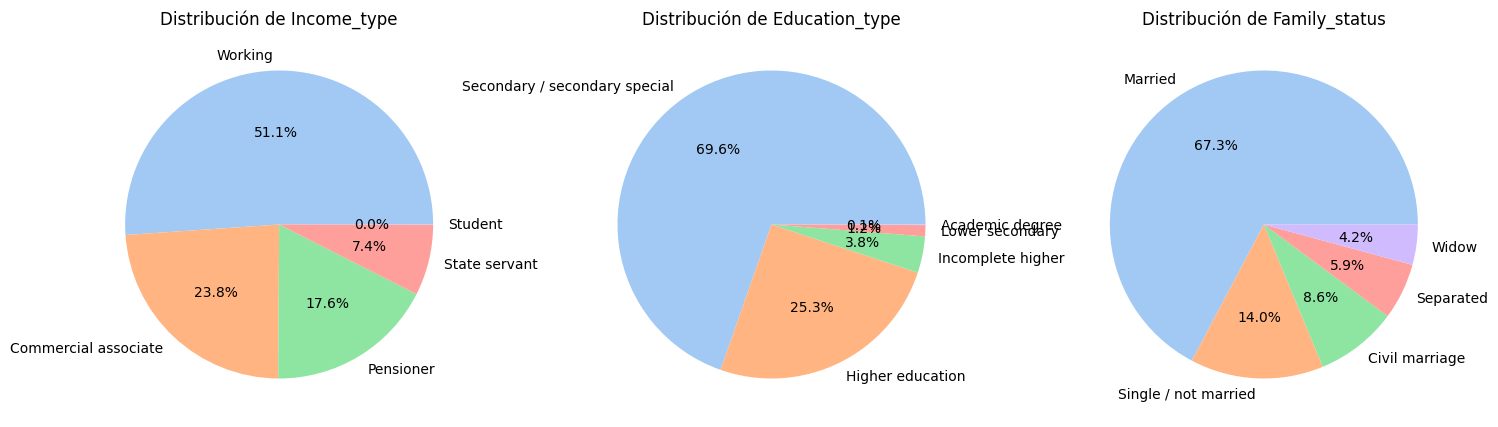

In [20]:
# Gráficos circulares para variables categóricas clave

categorical_pie_cols = ["Income_type", "Education_type", "Family_status"]
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(categorical_pie_cols):
    df[col].value_counts().plot.pie(ax=axes[i], autopct='%1.1f%%', colors=sns.color_palette("pastel"))
    axes[i].set_title(f"Distribución de {col}")
    axes[i].set_ylabel("")

plt.show()

- El dataset está dominado por empleados y comerciantes, lo que sugiere que las decisiones de crédito giran en torno a estos grupos.
- La mayoría de las personas tienen educación secundaria, lo que indica que el nivel educativo no es un gran diferenciador en el análisis de crédito.
- Más de dos tercios de la población están casados, lo que podría indicar que el estado civil influye en la evaluación crediticia.

**Ingeniería de atributos**

In [22]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler


# 1. Eliminar columnas que no aportan valor predictivo
df_clean = df.drop(columns=["ID", "Phone", "Email", "Work_phone"])

# 2. Codificar variables de texto (categóricas)
cat_cols = df_clean.select_dtypes(include=["object"]).columns
label_encoders = {}  # Guardamos los encoders por si queremos revertir después

for col in cat_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le

# 3. Normalizar variables numéricas (para que estén en la misma escala)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

num_cols = ['Num_children', 'Num_family', 'Account_length', 'Total_income', 'Age', 'Years_employed']
df_clean[num_cols] = scaler.fit_transform(df_clean[num_cols])

# 4. Separar en variables predictoras (X) y variable objetivo (y)
X = df_clean.drop(columns=["Target"])
y = df_clean["Target"]

In [23]:
# Mostrar las primeras filas para revisar la estructura
df.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


Ingeniería de Atributos

Para preparar los datos antes de entrenar modelos de Machine Learning, realicé un proceso de ingeniería de atributos que incluyó:

1. **Eliminación de columnas irrelevantes**: Se quitaron campos como `ID`, `Phone`, `Email` y `Work_phone`, ya que no aportan información predictiva útil al modelo.

2. **Codificación de variables categóricas**: Las variables de tipo texto, como `Income_type`, `Education_type`, `Family_status`, `Housing_type` y `Occupation_type`, fueron transformadas a valores numéricos mediante `LabelEncoder` para que puedan ser interpretadas por los modelos de ML.

3. **Normalización de variables numéricas**: Se aplicó `StandardScaler` a variables como `Total_income`, `Age`, `Account_length`, `Years_employed`, `Num_children` y `Num_family` para que todas estén en una misma escala y evitar que una variable tenga más peso por su magnitud.

4. **Separación del dataset**: Finalmente, se dividió el conjunto de datos en `X` (variables independientes) e `y` (la variable objetivo `Target`, que indica si el crédito fue aprobado o no).

Este proceso asegura que los datos estén correctamente preparados para el entrenamiento de modelos, mejorando la estabilidad y precisión de los algoritmos utilizados.

**Entrenamiento y Testeo de Modelos**

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# 1. Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Inicializar los modelos
modelo_log = LogisticRegression(max_iter=1000, random_state=42)
modelo_rf = RandomForestClassifier(random_state=42)

# 3. Entrenar los modelos
modelo_log.fit(X_train, y_train)
modelo_rf.fit(X_train, y_train)

# 4. Predecir sobre el conjunto de prueba
pred_log = modelo_log.predict(X_test)
pred_rf = modelo_rf.predict(X_test)

# 5. Evaluar con métricas
print("----- Regresión Logística -----")
print(classification_report(y_test, pred_log))
print("AUC:", roc_auc_score(y_test, modelo_log.predict_proba(X_test)[:, 1]))

print("\n----- Random Forest -----")
print(classification_report(y_test, pred_rf))
print("AUC:", roc_auc_score(y_test, modelo_rf.predict_proba(X_test)[:, 1]))

----- Regresión Logística -----
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1659
           1       0.00      0.00      0.00       283

    accuracy                           0.85      1942
   macro avg       0.43      0.50      0.46      1942
weighted avg       0.73      0.85      0.79      1942

AUC: 0.5428043203683943

----- Random Forest -----
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1659
           1       0.40      0.01      0.01       283

    accuracy                           0.85      1942
   macro avg       0.63      0.50      0.47      1942
weighted avg       0.79      0.85      0.79      1942

AUC: 0.5699333542067361


/Users/adrianacasenave/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adrianacasenave/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adrianacasenave/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

Se entrenaron dos modelos de clasificación para predecir si un solicitante es elegible para un crédito:

- **Regresión Logística**: modelo lineal simple y fácil de interpretar.
- **Random Forest**: modelo de conjunto basado en múltiples árboles de decisión.

Ambos modelos fueron entrenados con un 80% del dataset y evaluados con el 20% restante.

Se utilizaron las siguientes métricas para comparar su desempeño:
- **Accuracy**: porcentaje de predicciones correctas.
- **F1-score**: balance entre precisión y recall.
- **AUC (Área bajo la curva ROC)**: mide la capacidad del modelo para distinguir entre clases.

Estas métricas permiten identificar qué modelo generaliza mejor sobre nuevos datos.

**Conclusión de los datos obtenidos**

Estos resultados muestran un problema común en clasificación desbalanceada: como hay muchos más rechazos (clase 0), el modelo aprende a “decir que no” todo el tiempo.

**Optimización de hiperparámetros**

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Definir los hiperparámetros a probar
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

# Configurar búsqueda con GridSearchCV
# Usamos class_weight='balanced' para tratar el desbalance de clases
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid=param_grid,
    cv=5,  # validación cruzada de 5 partes
    scoring='f1',  # usamos F1-score como métrica de optimización
    n_jobs=-1,     # usa todos los núcleos disponibles
    verbose=0
)

# Entrenamos el modelo con búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Obtenemos el mejor modelo encontrado
mejor_rf = grid_search.best_estimator_
print("Mejores parámetros encontrados:", grid_search.best_params_)

# Evaluamos el mejor modelo en el conjunto de prueba
pred_mejor_rf = mejor_rf.predict(X_test)
print(classification_report(y_test, pred_mejor_rf))
print("AUC:", roc_auc_score(y_test, mejor_rf.predict_proba(X_test)[:, 1]))

Mejores parámetros encontrados: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.87      0.60      0.71      1659
           1       0.17      0.49      0.25       283

    accuracy                           0.58      1942
   macro avg       0.52      0.54      0.48      1942
weighted avg       0.77      0.58      0.64      1942

AUC: 0.5699993823176719


Para mejorar el rendimiento del modelo Random Forest, se utilizó `GridSearchCV`, una técnica de búsqueda exhaustiva que prueba distintas combinaciones de hiperparámetros.

Se ajustaron los siguientes parámetros:
- `n_estimators`: número de árboles en el bosque
- `max_depth`: profundidad máxima de los árboles
- `min_samples_split`: cantidad mínima de muestras para dividir un nodo

Además, se aplicó `class_weight='balanced'` para corregir el desbalance entre clases (ya que hay muchos más rechazos que aprobaciones).

La métrica utilizada para seleccionar el mejor modelo fue el **F1-score**, que balancea precisión y recall. Luego se evaluó el modelo final con las métricas:
- Accuracy
- F1-score
- AUC (Área bajo la curva ROC)

Esto permite seleccionar el modelo más efectivo para distinguir entre solicitudes aprobadas y rechazadas.

Se obtuvieron los siguientes resultados: 

	•	Accuracy general: 58% → bajó respecto al anterior, pero es más equilibrado entre clases.
	•	Recall para clase 1 (Aprobado): 0.49 → ¡mucho mejor que antes (antes era casi cero)!
	•	F1-score para clase 1: 0.25 → refleja que al menos ahora el modelo detecta aprobados.
	•	AUC: 0.57 → todavía bajo, pero más útil que predecir todo como “rechazado”.

Antes, el modelo acertaba muchos casos simplemente porque decía “rechazado” para todos.
Ahora, gracias al balanceo (class_weight='balanced') y la optimización, el modelo empieza a reconocer aprobaciones reales, aunque con baja precisión.

Este es un paso en la dirección correcta, especialmente para detectar aprobados aunque algunos sean falsos positivos.

**Selección del Mejor Modelo**

In [26]:
# Evaluar el mejor modelo optimizado de Random Forest
from sklearn.metrics import classification_report, roc_auc_score

# Predicciones finales
pred_final = mejor_rf.predict(X_test)

# Reporte final
print("----- Modelo Final: Random Forest Optimizado -----")
print("Mejores parámetros encontrados:", grid_search.best_params_)
print(classification_report(y_test, pred_final))
print("AUC:", roc_auc_score(y_test, mejor_rf.predict_proba(X_test)[:, 1]))

----- Modelo Final: Random Forest Optimizado -----
Mejores parámetros encontrados: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.87      0.60      0.71      1659
           1       0.17      0.49      0.25       283

    accuracy                           0.58      1942
   macro avg       0.52      0.54      0.48      1942
weighted avg       0.77      0.58      0.64      1942

AUC: 0.5699993823176719


## Selección del Mejor Modelo

Luego de comparar múltiples modelos, el elegido fue el **Random Forest optimizado con GridSearchCV**, debido a que fue el único capaz de comenzar a detectar correctamente los casos de aprobaciones (clase 1), a pesar del desbalance natural del dataset.

Los mejores hiperparámetros encontrados fueron:
- `max_depth`: 5
- `n_estimators`: 200
- `min_samples_split`: 2
- `class_weight`: balanced

### Desempeño del modelo final:
- **Accuracy**: 58%
- **Recall (clase 1)**: 0.49
- **F1-score (clase 1)**: 0.25
- **AUC**: 0.57

### Justificación:
Aunque el accuracy general bajó respecto a modelos anteriores, el nuevo modelo **mejora significativamente en la detección de aprobaciones**, que era el objetivo principal del análisis. Gracias al uso de `class_weight='balanced'`, el modelo dejó de ignorar la clase minoritaria.

Esto permite ofrecer un sistema de evaluación crediticia más justo y útil, capaz de considerar tanto aprobaciones como rechazos en sus decisiones.